In [1]:
import os

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from visualization_utils import plot_heatmap

names_mapping = {
    'REV1_1': 1,
    'REV2_1': 2,
    'CF3': 3,
    'CF9': 4,
    'CF11': 5,
    'CF12': 6,
    'CF14': 7
}


In [4]:
from sklearn.metrics import pairwise_distances

def make_dist(X):
    dist_matr = pairwise_distances(X) / np.sqrt(X.shape[1])
    return dist_matr

In [5]:
source_path = 'soil_CFs'
dirs = [d for d in os.listdir(source_path)]
dirs

['CF11_NN',
 'CF11',
 'CF9_NN',
 'CF12_NN',
 'REV1_1_NN',
 'CF3',
 'REV1_1',
 'CF12',
 'CF14_NN',
 'CF9',
 'REV2_1',
 'REV2_1_NN',
 'CF3_NN',
 'CF14']

In [6]:
from data_utils import read_data, normalization, plot_results

In [7]:
shape = 350

In [8]:
tags = ['C2', 'L2', 'S2', 'SS2']

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = dict()
X = []
Y = []
for dir_name in dirs:
    data_path = os.path.join(source_path, dir_name) 
    cdata = read_data(data_path)
    compressed = {tag: np.zeros(shape) for tag in tags}
    for k, v in cdata.items():
        compressed[k[:-1]] += normalization(cdata, k)
    vectors = []
    for tag in ['S2']:
        vectors.append(compressed[tag] / 3)
    data[dir_name] = np.concatenate(vectors)
    X.append(np.concatenate(vectors).reshape(1, -1))
    Y.append(dir_name)
X = np.concatenate(X, axis=0)

In [11]:
X_plot = []
Y_plot = []
for i, y in enumerate(Y):
    if not y.endswith('NN'):
        X_plot.append(X[i])
        Y_plot.append(y)
X_plot = np.array(X_plot)

In [12]:
order = sorted(np.arange(len(Y_plot)), key=lambda item: names_mapping[Y_plot[item]])

In [13]:
X_plot = X_plot[order]
Y_plot = np.array(Y_plot)[order]

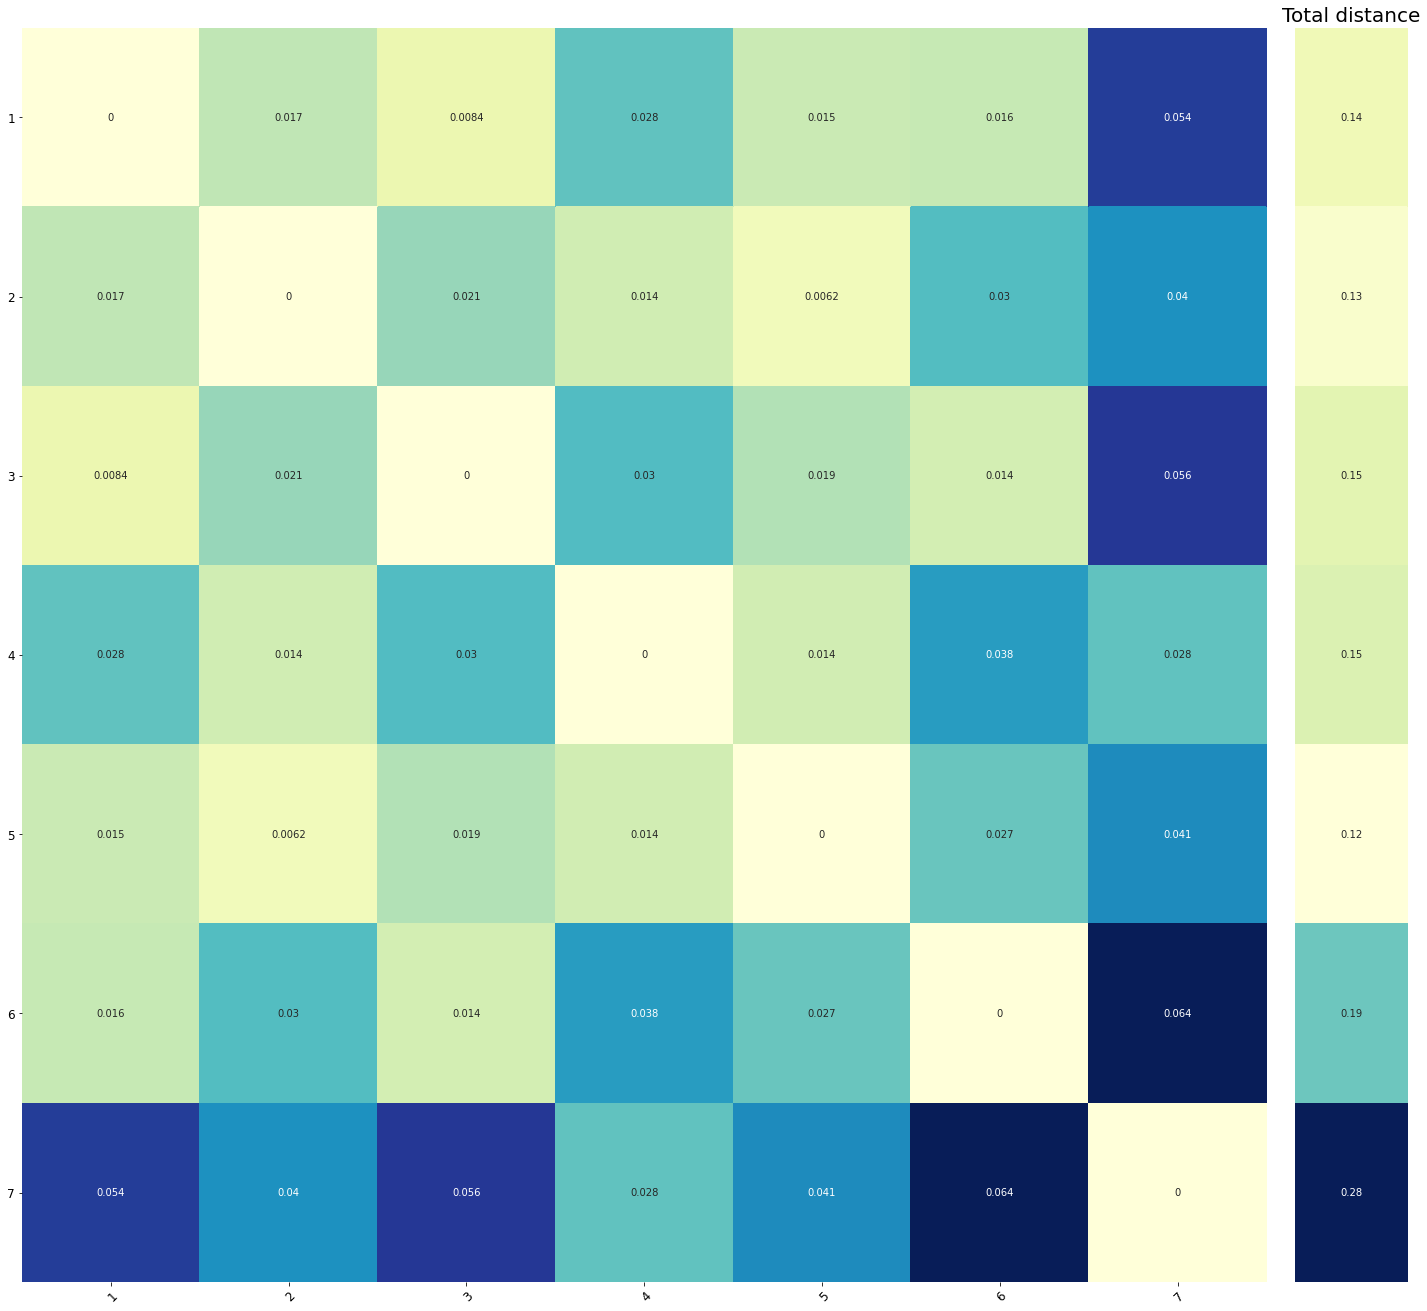

In [14]:
plot_heatmap(data=make_dist(X_plot), 
             Y=np.arange(len(Y_plot)) + 1, 
             exp_name='S2', 
             tex='', 
             title='', 
             dpi=400, 
             use_title=False)

In [15]:
scaler = StandardScaler().fit(X_plot)
X_scaled = scaler.transform(X_plot)

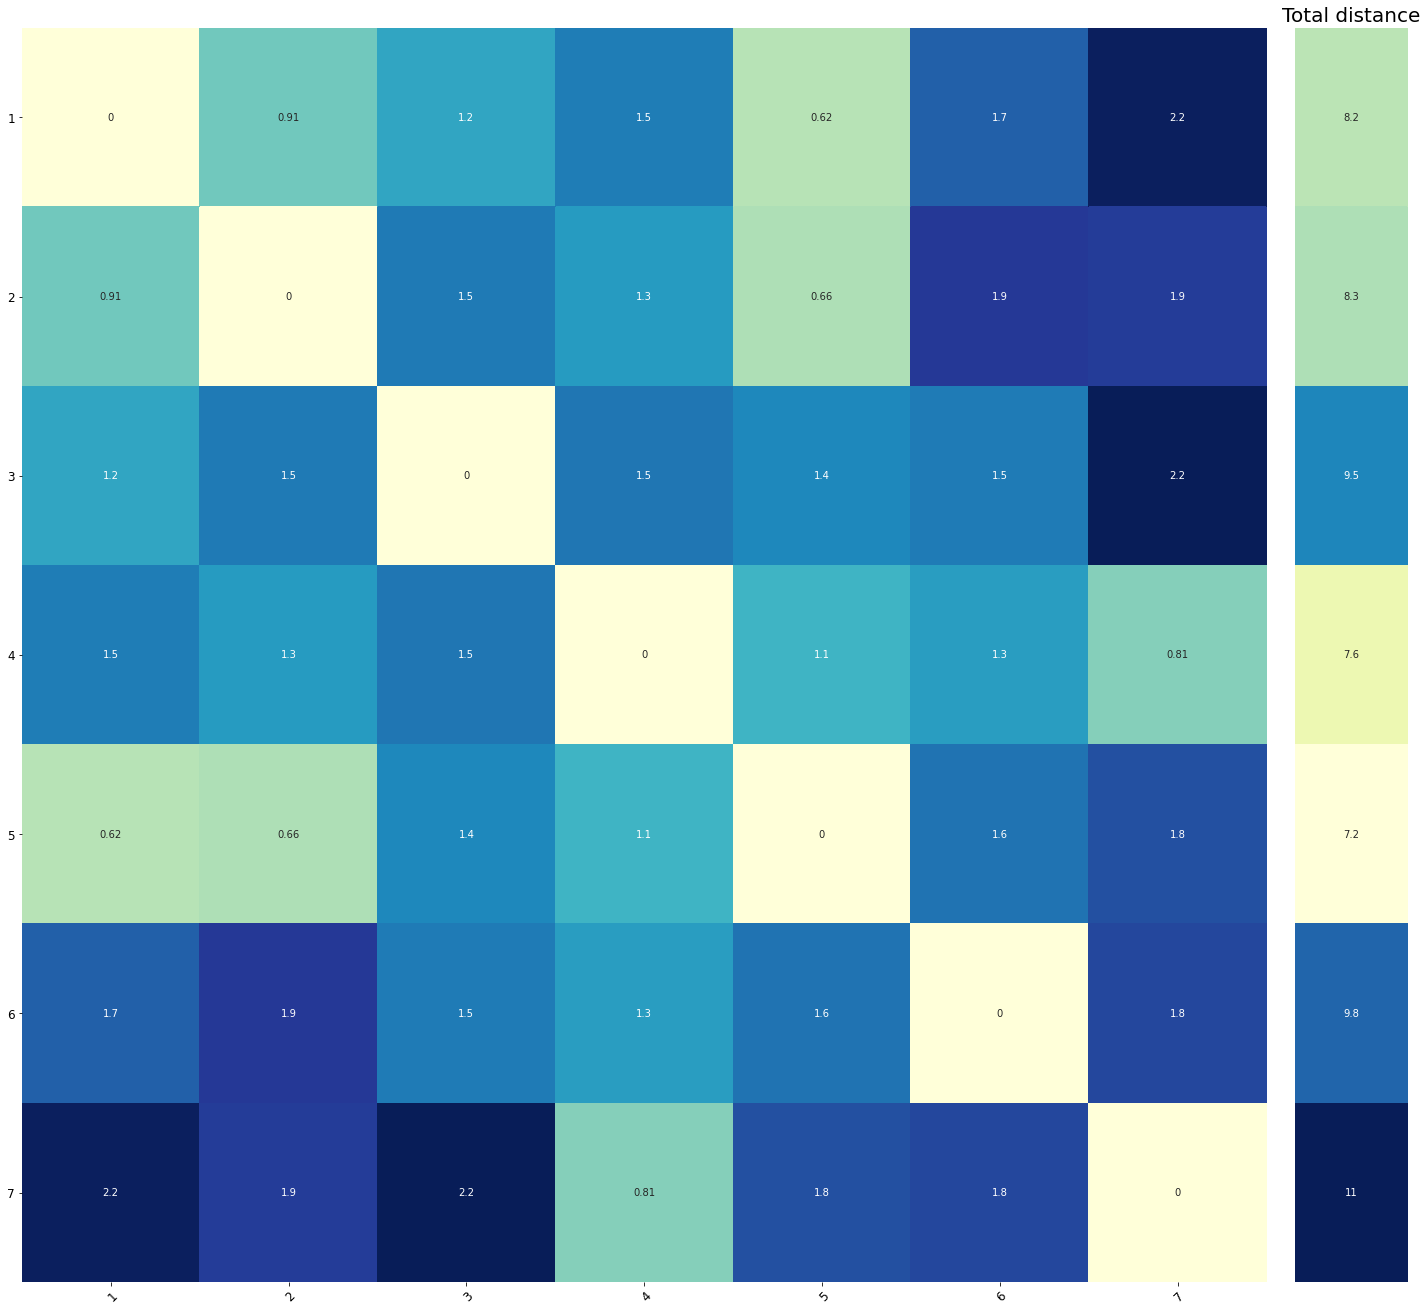

In [16]:
plot_heatmap(data=make_dist(X_scaled), 
             Y=np.arange(len(Y_plot)) + 1, 
             exp_name='S2_normalized', 
             tex='', 
             title='', 
             dpi=400, 
             use_title=False)

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('covariance.csv', delimiter=',')

In [19]:
Y_plot = sorted(df.columns)
Y_plot

['CF11', 'CF12', 'CF14', 'CF3', 'CF9', 'REV1_1', 'REV2_1']

In [20]:
X_plot = np.array([np.array(df[y]) for y in Y_plot])
X_plot = X_plot / X_plot[:, 0:1]

In [21]:
order = sorted(np.arange(len(Y_plot)), key=lambda item: names_mapping[Y_plot[item]])

In [22]:
X_plot = X_plot[order]
Y_plot = np.array(Y_plot)[order]

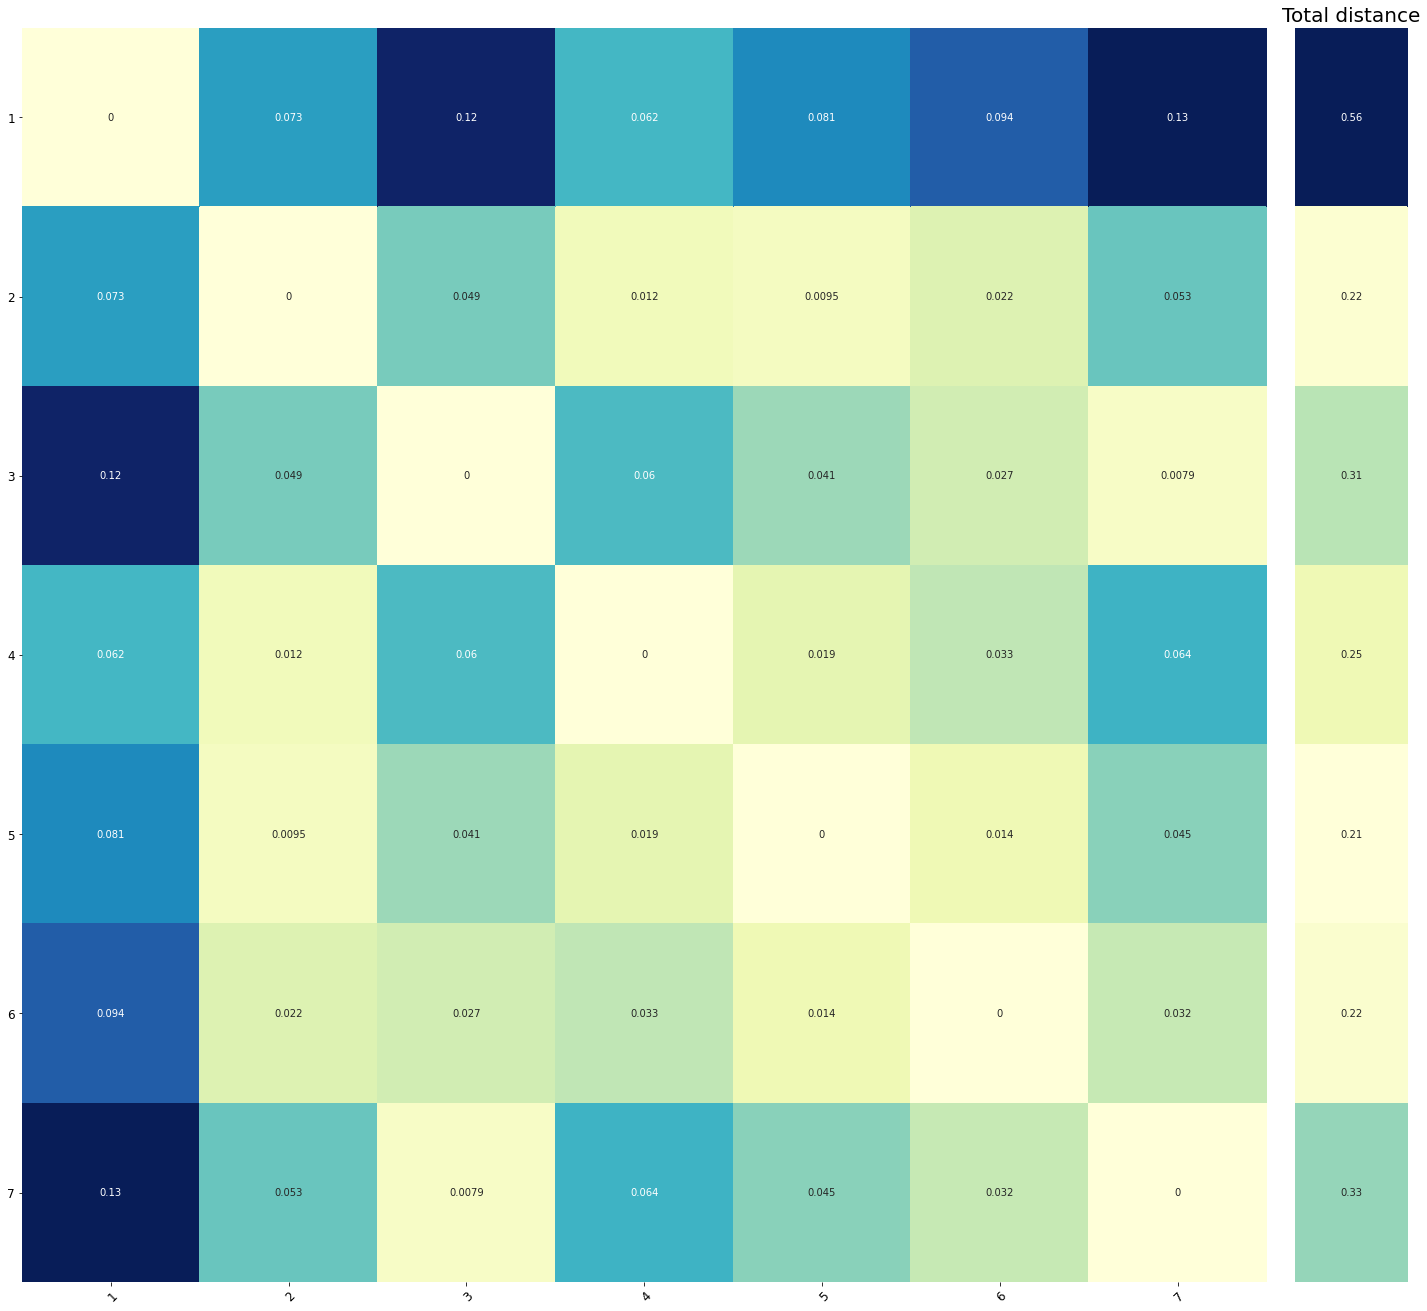

In [23]:
plot_heatmap(data=make_dist(X_plot), 
             Y=np.arange(len(Y_plot)) + 1, 
             exp_name='cov', 
             tex='', 
             title='', 
             dpi=400, 
             use_title=False)

In [24]:
scaler = StandardScaler().fit(X_plot)
X_scaled = scaler.transform(X_plot)

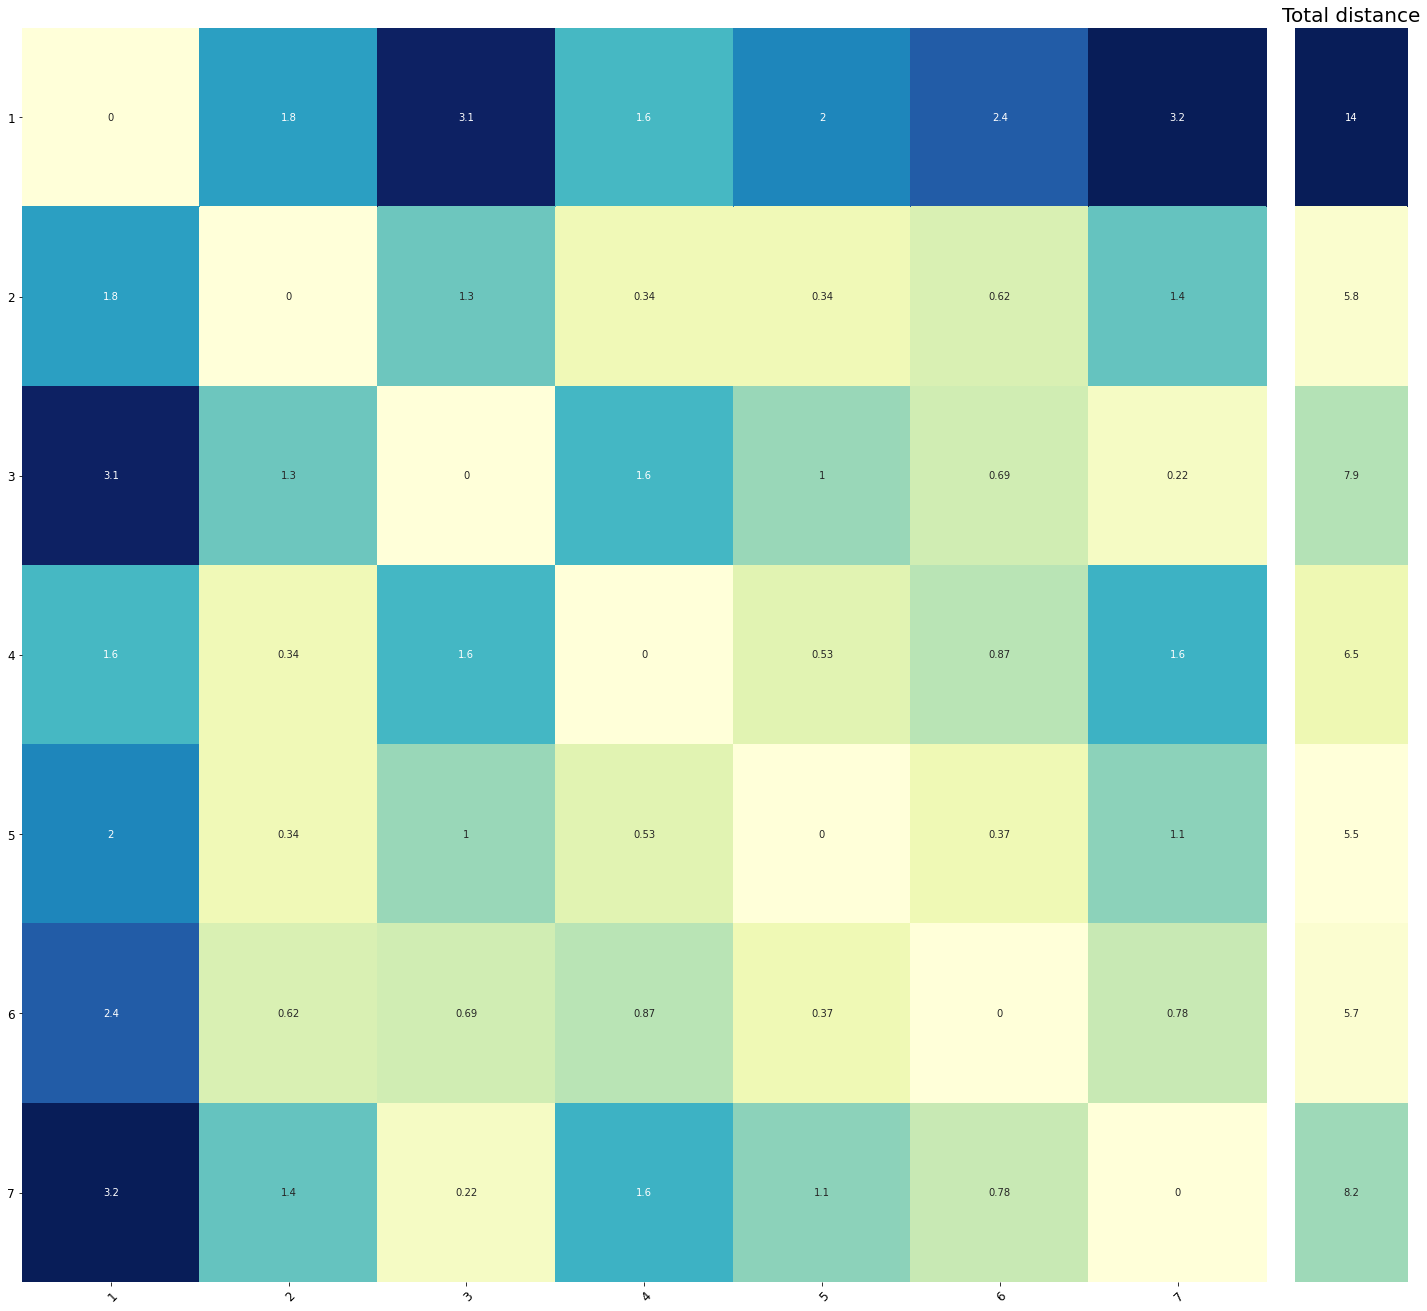

In [25]:
plot_heatmap(data=make_dist(X_scaled), 
             Y=np.arange(len(Y_plot)) + 1, 
             exp_name='cov_normalized', 
             tex='', 
             title='', 
             dpi=400, 
             use_title=False)